In [17]:
# Import Libraries
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Model and test data loading

modello = load_model('E:\whistle_identification\DOLPHI\\vanilla_model_2_48kHz.keras')

test_X = np.load('E:\whistle_identification\DOLPHI\\total_testX.npy', allow_pickle=True)
test_y = np.load('E:\whistle_identification\DOLPHI\\total_testY.npy', allow_pickle=True)
test_y = test_y.astype(np.int32)


In [19]:
# Prediction ...

y_pred = modello.predict(test_X)


y_pred1 = []


for i in y_pred:
    if i[0]>= 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

y_pred1 = np.array(y_pred1)

35/35 [==============================] - 7s 131ms/step


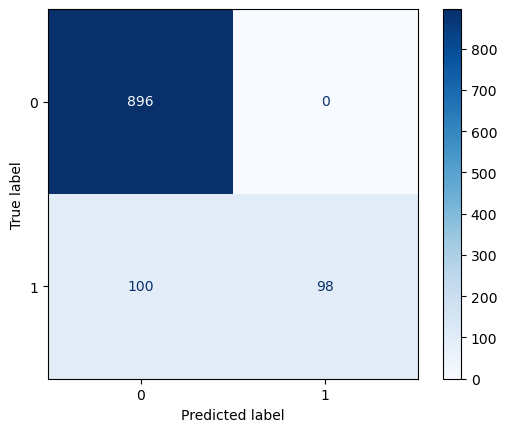

In [20]:
# Confusion Matrix 

cm = confusion_matrix(test_y, y_pred1, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
# Metrics calculation
print(classification_report(test_y,y_pred1)) # accuracy = 0.908

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       1.00      0.49      0.66       198

    accuracy                           0.91      1094
   macro avg       0.95      0.75      0.80      1094
weighted avg       0.92      0.91      0.90      1094

